# **Wikipedia: blocking of users and policies**


## Library Imports

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import csv 
import matplotlib.gridspec as gridspec
# import json
import datetime as dt
import scipy.stats as stat
import seaborn as sns
from sklearn import preprocessing


# setting plotting parameters
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.color'] = 'gray'

## Load the clean dataset

In [3]:
# setting up the working directory in local machine 

folder = "D:\LPI\Open Science\Wikipedia_2022\data_original"
folder_result = "D:\LPI\Open Science\Wikipedia_2022\data_results"

In [4]:
file = '/merged_data_2005-2023.csv'

# uncomment the code below to save
df = pd.read_csv(folder+file)

In [5]:
df.tail()

,month,editors.anonymous,editors.user,editors.name-bot,editors.group-bot,editors.total,active-editors.total,edits.anonymous,edits.user,edits.name-bot,...,n_editor_user,n_editor_all_block,n_editor_ip_block,n_editor_bot_block,n_editor_user_block,n_editor_all_unblock,n_editor_ip_unblock,n_editor_bot_unblock,n_editor_user_unblock,tag_number
223,2023-08-01,218541,121026,78.0,114.0,339759.0,37763,618094,3550686,6715.0,...,204,497,465,0,32,0,0,0,0,58
224,2023-09-01,219391,120653,72.0,116.0,340232.0,38760,610776,3220975,10965.0,...,7164,445213,438081,0,7132,156,52,1,103,58
225,2023-10-01,226690,124411,63.0,118.0,351282.0,40051,626440,3510703,7556.0,...,6966,468161,461221,1,6939,138,43,0,95,58
226,2023-11-01,225791,122564,71.0,118.0,348544.0,39570,615859,3455103,7141.0,...,7055,446977,439949,0,7028,137,50,0,87,58
227,2023-12-01,213825,118306,67.0,119.0,332317.0,38264,605376,3569871,7460.0,...,6847,456131,449312,1,6818,109,19,1,89,58


In [6]:
df.shape

(228, 63)

# **Part C:** Figure to produce for the Poster

## Figure 1- **Editors**: In this figure we need to include:
1. Line plot of the editors over time (features == editors.anonymous, editors.users)

All with respect to time (Months on the X axis)

In [7]:
# At first converting the month column to pandas datetime format 
df['month'] = pd.to_datetime(df['month']) 

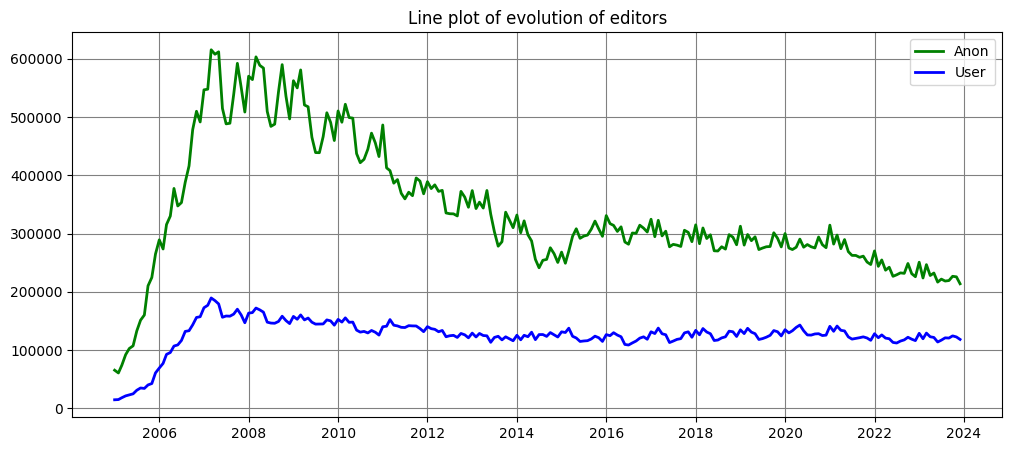

In [8]:
plt.figure(figsize=(12,5))

plt.title("Line plot of evolution of editors")
plt.plot(df['month'], df['editors.anonymous'], label = 'Anon', lw=2.0, color='green')
plt.plot(df['month'], df['editors.user'], label = 'User', lw=2.0, color='blue')

plt.xticks()
plt.legend()
plt.show()

In [71]:
print("Anon editors total = ", df['editors.anonymous'].sum())
print("User editors total = ", df['editors.user'].sum())

Anon editors total =  77208224
User editors total =  28764659


## Figure 2- **Edits**: In this figure we need to include:
1. Line plot of the edits over time (features == edits.anonymous, edits.users)

All with respect to time (Months on the X axis)

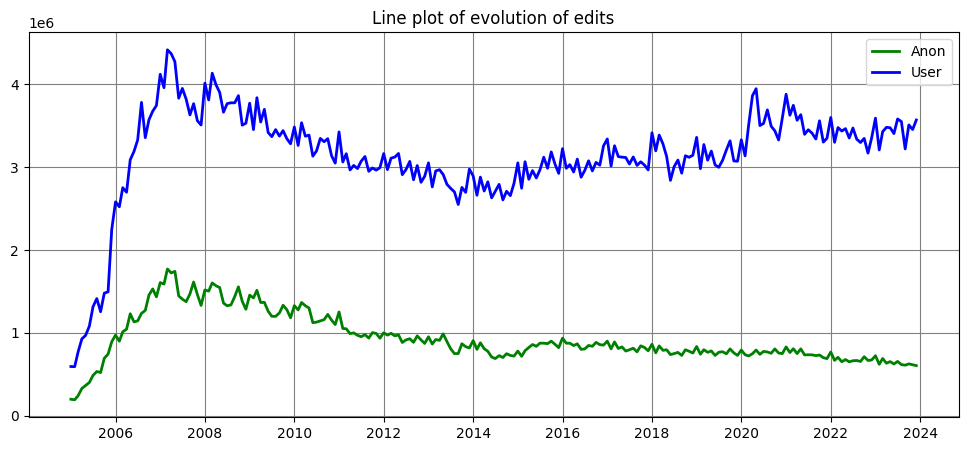

In [9]:
plt.figure(figsize=(12,5))

plt.title("Line plot of evolution of edits")
plt.plot(df['month'], df['edits.anonymous'], label = 'Anon', lw=2.0, color='green')
plt.plot(df['month'], df['edits.user'], label = 'User', lw=2.0, color='blue')
# plt.plot(df['month'], df['tag_number'], label = 'User', lw=2.0, color='blue')

plt.xticks()
plt.legend()
plt.show()

In [72]:
print("Anon edits total = ", df['edits.anonymous'].sum())
print("User edits total = ", df['edits.user'].sum())

Anon edits total =  212228035
User edits total =  718115913


## Figure 3- **Policy**: In this figure we need to include: 
1. Bar Plot of Policy Evolution

All with respect to time (Months on the X axis)

<Figure size 1200x500 with 0 Axes>

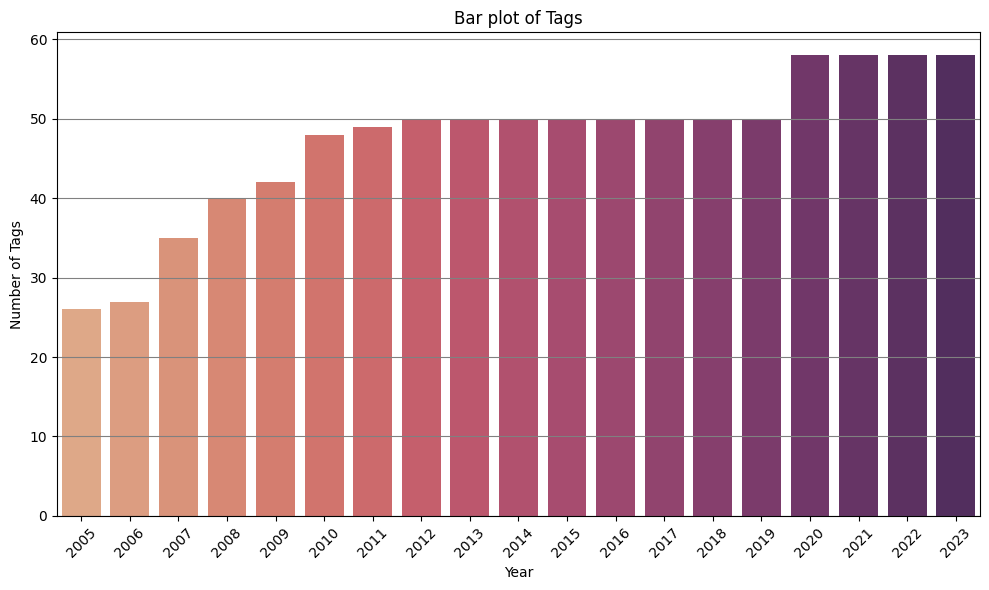

In [10]:
plt.figure(figsize=(12,5))

df['year'] = df['month'].dt.year
years = list(set(df['year']))

# Aggregating data by year
yearly_data = df.groupby('year')['tag_number'].sum().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# dividing by 12 since I calculated the cumulative sum
sns.barplot(data=(yearly_data/12), x=years, y='tag_number', palette="flare")

plt.title("Bar plot of Tags")
plt.xlabel('Year')
plt.ylabel('Number of Tags')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.show()

## Figure 4- **No. of editors blocked**: In this figure we need to include: 
1. Line plot of blocked editors (n_editor_user_block, n_editor_ip_block )

All with respect to time (Months on the X axis)

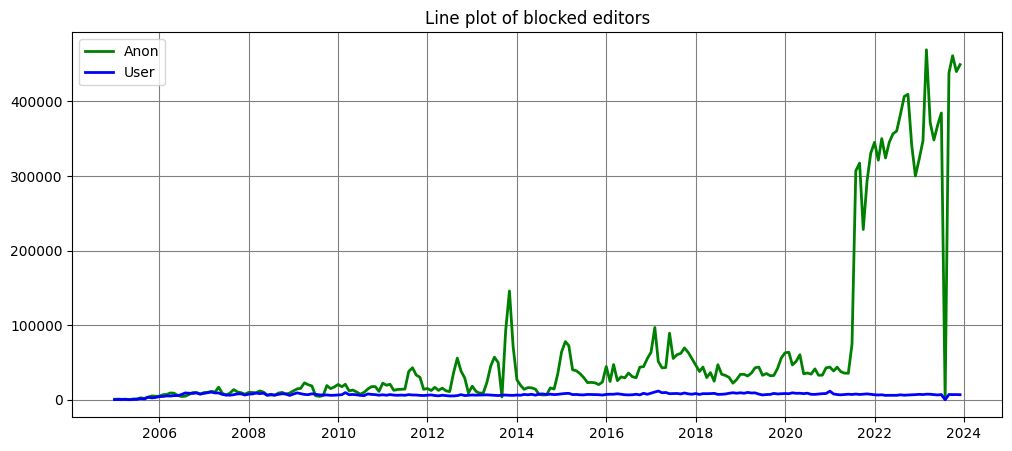

In [11]:
plt.figure(figsize=(12,5))


plt.title("Line plot of blocked editors")
plt.plot(df['month'], df['n_editor_ip_block'], label = 'Anon', lw=2.0, color='green')
plt.plot(df['month'], df['n_editor_user_block'], label = 'User', lw=2.0, color='blue')

plt.xticks()
plt.legend()
plt.show()

## Figure 5- **Policy Barplot & Ratio Line**: In this figure we need to include: 
1. Ratio plots (Blocked vs Editors)
2. Policy Evolution Barplot
   
All with respect to time (Months on the X axis)

<Figure size 1200x500 with 0 Axes>

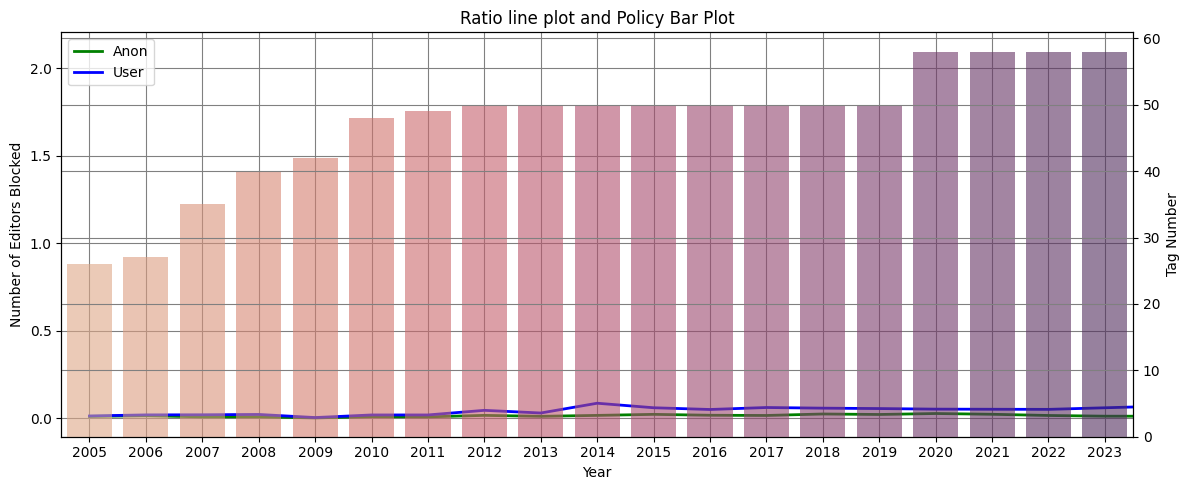

In [19]:
#line plot
plt.figure(figsize=(12,5))

fig, ax1 = plt.subplots(figsize=(12, 5))

# Plotting line plots
ax1.set_title("Ratio line plot and Policy Bar Plot")
ax1.plot((df['n_editor_ip_block']/df['editors.anonymous']), label = 'Anon', lw=2.0, color='Green')
ax1.plot((df['n_editor_user_block']/df['editors.user']), label = 'User', lw=2.0, color='blue')

# Plotting bar plot on secondary axis
ax2 = ax1.twinx()
sns.barplot(data=(yearly_data/12), x=years, y='tag_number', palette="flare", alpha = 0.6)

ax1.legend(loc='upper left')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Editors Blocked')
ax2.set_ylabel('Tag Number')

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Statistics

In [16]:
# df['tag_number']
df['n_editor_ip_block']
df['n_editor_user_block']

0       203
1       301
2       376
3       481
4       111
       ... 
223      32
224    7132
225    6939
226    7028
227    6818
Name: n_editor_user_block, Length: 228, dtype: int64

## Normalizing

In [38]:
# normalizing tags 
tag_norm = np.array(df['tag_number'])
tag_norm = preprocessing.normalize([tag_norm], norm='max')
tag_norm = tag_norm.transpose()

# normalizing anon editor block 
editors_anon = np.array((df['n_editor_ip_block']*100) / df['editors.total'])
editors_anon = preprocessing.normalize([editors_anon], norm='max')
editors_anon = editors_anon.transpose()

# normalizing user eeditors_userditor block 
editors_user = np.array(((df['n_editor_user_block']*100) / df['editors.total']))
editors_user = preprocessing.normalize([editors_user], norm='max')
editors_user = editors_user.transpose()

## Plotting the normalized data

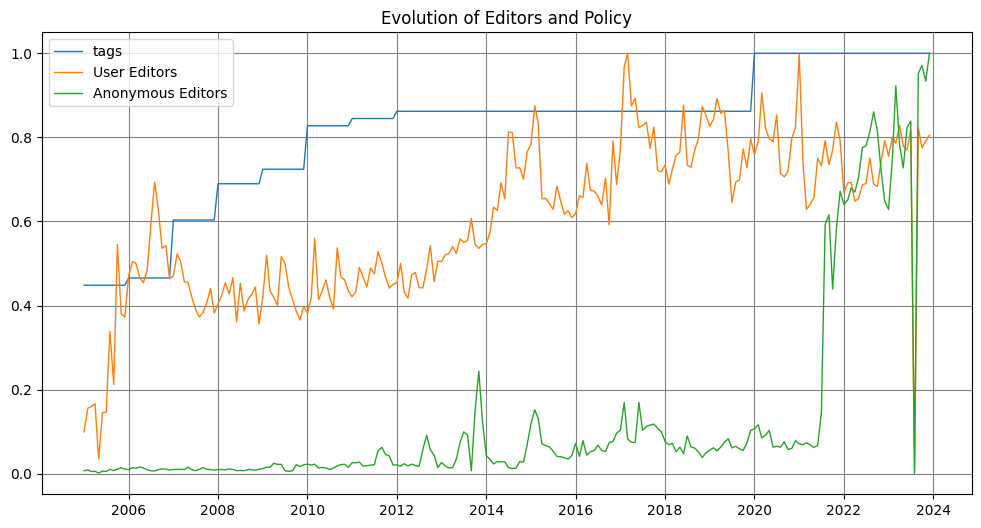

In [41]:
plt.figure(figsize=(12,6))

plt.title("Evolution of Editors and Policy")
plt.plot(df['month'], tag_norm, lw=1.0, label = 'tags')
plt.plot(df['month'], editors_user, lw=1.0, label = 'User Editors')
plt.plot(df['month'], editors_anon, lw=1.0, label = 'Anonymous Editors')
plt.legend()


## Seeing the Scatter Plot

Text(0.5, 1.0, 'Scatterplot between two variables of concern')

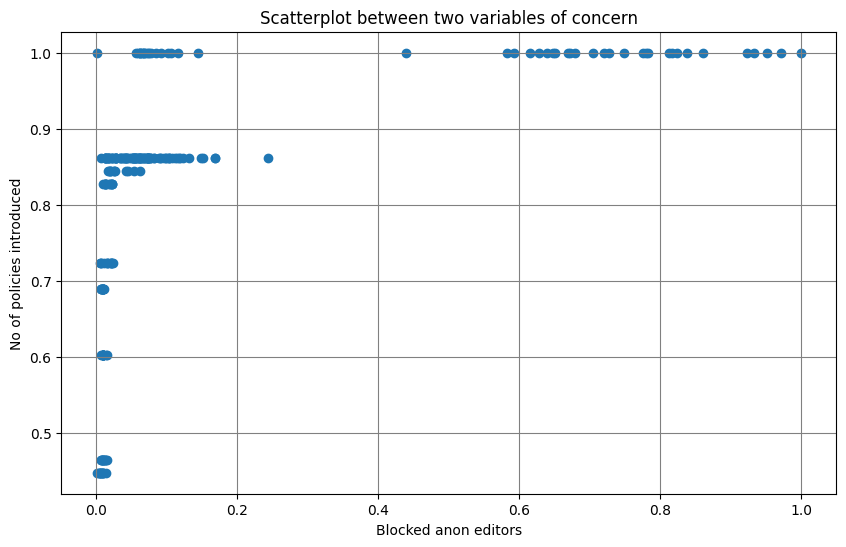

In [40]:
# scatter between tags and anon editors and user editors  
plt.figure(figsize=(10,6))
# plt.scatter(editors_user, tag_norm)
plt.scatter(editors_anon, tag_norm)
plt.xlabel("Blocked anon editors")
plt.ylabel("No of policies introduced")
plt.title("Scatterplot between two variables of concern")

## Reshaping & Dependency Test

In [58]:
editors_user= editors_user.reshape(-1)
editors_anon = editors_anon.reshape(-1)
tag_norm = tag_norm.reshape(-1)


### Dependency test Between User Editors and Tags

In [65]:
print("------DEPENDENCY TEST BETWEEN USER EDITORS AND TAGS INTRODUCED OVER TIME-------\n")
pearson_corr =  stat.pearsonr(editors_user, tag_norm)
print("Pearsons Test: ", pearson_corr)
spearman_corr = stat.spearmanr(editors_user, tag_norm)
print("Spearman Test: ", spearman_corr)
kendalltau_corr = stat.kendalltau(editors_user, tag_norm)
print("Kendalltau Test: ", kendalltau_corr)

------DEPENDENCY TEST BETWEEN USER EDITORS AND TAGS INTRODUCED OVER TIME-------

Pearsons Test:  (0.6530146535262894, 4.240162389148854e-29)
Spearman Test:  SpearmanrResult(correlation=0.7365342333591636, pvalue=3.0316061232466457e-40)
Kendalltau Test:  KendalltauResult(correlation=0.5760638943535467, pvalue=2.896684388158355e-32)


### Dependency test Between Anonymous Editors and Tags

In [66]:
print("------DEPENDENCY TEST BETWEEN ANONYMOUS EDITORS AND TAGS INTRODUCED OVER TIME-------\n")
pearson_corr =  stat.pearsonr(editors_anon, tag_norm)
print("Pearsons Test: ", pearson_corr)
spearman_corr = stat.spearmanr(editors_anon, tag_norm)
print("Spearman Test: ", spearman_corr)
kendalltau_corr = stat.kendalltau(editors_anon, tag_norm)
print("Kendalltau Test: ", kendalltau_corr)

------DEPENDENCY TEST BETWEEN ANONYMOUS EDITORS AND TAGS INTRODUCED OVER TIME-------

Pearsons Test:  (0.49715214137815583, 1.2293673591932031e-15)
Spearman Test:  SpearmanrResult(correlation=0.8378277745102423, pvalue=2.478740460734986e-61)
Kendalltau Test:  KendalltauResult(correlation=0.7000751906026736, pvalue=7.903782505954422e-47)
